# Estimating $p_{\rm 353}$

In order to evaluate the polarization fraction at a resolution different to the input GNILC maps, we have to do some extra work. 

### Debiasing 

Firstly, the polarized intensity is a quadratic function of the Stokes parameters:

$$
P = \sqrt{Q^2 + U^2}.
$$

Therefore, the noise in the Stokes maps will constitute an additive bias.

There are measures one can take to mitigate this bias, but they require an estimate of the uncertainty in each pixel of the $P$ map. This would be fine if we were using the maximum resolution, however we are smoothing to ~$80^\prime$. This scale is chosen as it is the resolution required to have a $>3-\sigma$ detection of $P$ over the whole sky.

### Smoothed covariance

When smoothing intensity maps, it is as simple as summing pixels multiplied by the Gaussian kernel you are applying. However, with $Q$ and $U$, one must also account for the small rotation of the reference axes between the two pixels being compared. This process is shown in Fig. A.1 of 1405.0871, and the relevant methods for both estimating the smoothed covariance and debiasing are in the accompanying text.

It is possible to compute the expected smoothed covariance by a careful rotation of the neighboring pixel's covariances, however, it is also possible, and much simpler to construct a Monte Carlo estimate of the transformed noise. As the process of smoothing is linear (being a sum over neighboring pixels, multiplied by a Gaussian-distributed weight) we expect the resulting uncertainty after smoothing to also be Gaussian.

#### Monte Carlo estimates

This method follows A.1.3 of 1405.0871. We simulate 100 realizations of noise at the full resolution of the input GNIL maps.

$$
$$

In [5]:
from astropy.io import fits
import healpy as hp
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt

## Input data

These quantities were also calculated for Clark+2019, and so to compare we have the files sent by Susan.

Download link for covariance matrices smoothed to 60': https://www.dropbox.com/s/eq8vtl4en9aperd/cov_mat_HFI_SkyMap_353-psb_2048_R3.01_RING_smooth60.fits?dl=0
Download link for covariance matrices smoothed to 80': https://www.dropbox.com/s/nnftjkq2jgh41k9/cov_mat_HFI_SkyMap_353-psb_2048_R3.01_RING_smooth80.fits?dl=0

These files are saved in:

60': cov_mat_HFI_SkyMap_353-psb_2048_R3.01_RING_smooth60.fits
80': cov_mat_HFI_SkyMap_353-psb_2048_R3.01_RING_smooth80.fits

In [8]:
# nside to use
root = Path(os.environ["SCRATCH"]) / "h1"

cov_mat_80 = root / "cov_mat_HFI_SkyMap_353-psb_2048_R3.01_RING_smooth80.fits"

hdu = fits.open(cov_mat_80)
display(hdu[0].header)

SIMPLE  =                    T /Primary Header created by MWRFITS v1.6a         
BITPIX  =                  -64 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =             50331648 /                                                
NAXIS2  =                    6 /                                                
EXTEND  =                    T /Extensions may be present                       

In [20]:
with fits.open(cov_mat_80) as hdu:
    arr = hdu[0].data

In [22]:
arr[:, 0]

array([ 4.65912774e-12,  5.59019967e-13, -6.79354328e-14,  1.08237871e-11,
       -1.12260192e-12,  1.34774088e-11])

In [23]:
planck_353_fn = root / "HFI_SkyMap_353-psb_2048_R3.01_full.fits" # 353 GHz data
gnilc_353_fn = root / "COM_CompMap_IQU-thermaldust-gnilc-unires_2048_R3.00.fits" # 353 GHz GNILC separated maps

In [24]:
hdu = fits.open(planck_353_fn)
display(hdu[1].header)
hdu = fits.open(gnilc_353_fn)
display(hdu[1].header)

XTENSION= 'BINTABLE'           /Written by IDL:  Mon Sep  3 21:12:20 2018       
BITPIX  =                    8 /                                                
NAXIS   =                    2 /Binary table                                    
NAXIS1  =                   40 /Number of bytes per row                         
NAXIS2  =             50331648 /Number of rows                                  
PCOUNT  =                    0 /Random parameter count                          
GCOUNT  =                    1 /Group count                                     
TFIELDS =                   10 /Number of columns                               
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTVER  =                    1 /Extension version                               
DATE    = '2018-09-03'      

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   36 / width of table in bytes                        
NAXIS2  =             50331648 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    9 / number of fields in each row                   
COMMENT  -------------------------------------------------------------          
COMMENT  Products from GNILC component separation method                        
COMMENT  -------------------------------------------------------------          
COMMENT  Further details in the Planck Legacy Archive and Explanatory Supplement
COMMENT  http://www.cosmos.e

In [34]:
gt, gq, gu, gii, giq, giu, gqq, gqu, guu = hp.read_map(str(planck_353_fn), field=(0, 1, 2, 4, 5, 6, 7, 8, 9))

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING


In [35]:
pt, pq, pu, ptt, ptq, ptu, pqq, pqu, puu = hp.read_map(str(gnilc_353_fn), field=(0, 1, 2, 3, 4, 5, 6, 7, 8))

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING


In [32]:
print(np.sqrt(cov_II))
print(np.sqrt(cov_II_gnilc))

[0.00022786 0.00023928 0.00023038 ... 0.0002378  0.00023676 0.00023953]
[3.17255551e-06 3.16261459e-06 3.17291555e-06 ... 3.33878299e-06
 3.32784037e-06 3.38991311e-06]


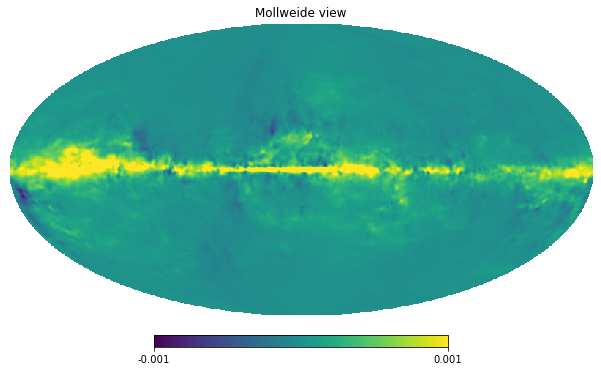

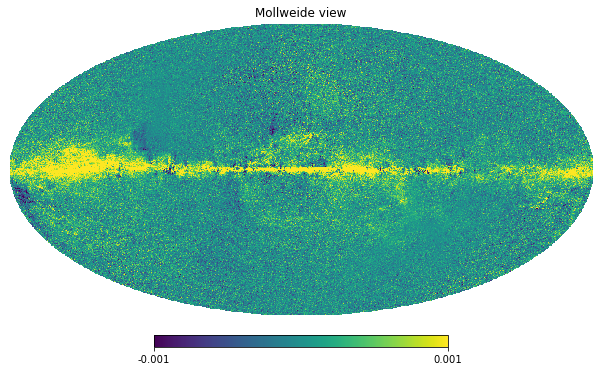

In [39]:
hp.mollview(pq, min=-1e-3, max=1e-3)
hp.mollview(gq, min=-1e-3, max=1e-3)